In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


## Loading Data

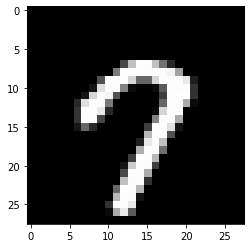

In [2]:
# unpack tuple
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.gray()
plt.imshow(x_train[random.randrange(60000)])

## Normalization

In [3]:
x_train = x_train/255
x_test = x_test/255

## One Hot Encoding
Converting categorial varibles to matrices, so that the ML algorith can do a better job.

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Build the Network

![FCNN](images/fcnn.png)

In [5]:
model = Sequential()
model.add(Flatten())
model.add(Dense(16,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Training

In [8]:
model.fit(x_train, y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.4446 - acc: 0.8701
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2412 - acc: 0.9301
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2070 - acc: 0.9399
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1885 - acc: 0.9449
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1731 - acc: 0.9489


## Evaluation

In [9]:
# returns a list with two items: loss and metric value, respectively
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 22us/step


[0.18785454838834703, 0.9454]

In [10]:
# predicting some digits
predictions = model.predict(x_test)

In [11]:
# extract integers
predicted_digits = np.argmax(predictions, axis=1)
random_choice = random.randrange(10000)
one_sample = x_test[random_choice]
predicted_digit = predicted_digits[random_choice]
true_digit = np.argmax(y_test, axis=1)[random_choice]

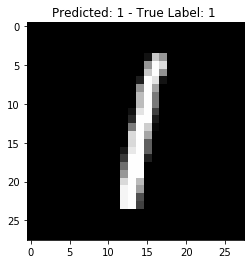

In [12]:
plt.gray()
plt.title('Predicted: %s - True Label: %s ' % (predicted_digit, true_digit))
plt.imshow(x_test[random_choice])